## Regularization

### Agenda
   
    ♦ Problem Description
    ♦ Data Understanding
    ♦ Split the data into Train and Validation sets
    ♦ Build a Multiple linear regression model
    ♦ Build a Ridge Regression model
    ♦ Build a Cross validated - Ridge Regression model and find lambda for ridge
    ♦ Build a Ridge Regression model with best lambda
    ♦ Build a Lasso Regression model
    ♦ Build an Elastic Net Regression model
    



### Problem Description


An online gaming portal wants to understand their customer patterns based on their transactional behavior. 
For this, they have constructed a customer level data based on the details they are tracking. The customer database consists of demographic and transactional information for each customer. Building a regression model to predict 
the customer revenue based on other factors.


### Data Reading

In [143]:
### Read data
data = 


### Data Understanding

Check the number of observations and attributes

Classify independent variables and dependent variable

In Linear Regression, the dependent variable is continuous variable.

For Multiple Linear Regression we will predict dependent variable with multiple independent variables.


In [144]:
## Dimensions



[1] 3209   14

In [145]:
## Structure



'data.frame':	3209 obs. of  14 variables:
 $ CustomerID                  : int  1001 1002 1003 1004 1005 1006 1007 1008 1009 1010 ...
 $ City                        : int  1 1 1 1 1 1 1 1 1 2 ...
 $ NoOfChildren                : int  2 2 4 1 3 2 3 2 4 3 ...
 $ MinAgeOfChild               : int  3 3 3 6 6 3 8 6 6 5 ...
 $ MaxAgeOfChild               : int  8 6 5 6 9 4 12 8 9 6 ...
 $ Tenure                      : int  210 442 424 261 422 378 369 404 420 333 ...
 $ FrquncyOfPurchase           : int  11 20 18 11 44 16 25 13 20 15 ...
 $ NoOfUnitsPurchased          : int  11 20 18 9 31 16 15 12 16 15 ...
 $ FrequencyOFPlay             : int  2344 245 1059 365 1066 228 75 1488 2743 1967 ...
 $ NoOfGamesPlayed             : int  108 22 130 34 102 12 2 118 163 56 ...
 $ NoOfGamesBought             : int  10 7 18 11 44 16 25 13 16 15 ...
 $ FavoriteChannelOfTransaction: Factor w/ 2 levels "Favorite","Uniform": 2 1 1 1 2 1 1 1 2 1 ...
 $ FavoriteGame                : Factor w/ 2 levels "Favorit

In [146]:
## First few rows



,CustomerID,City,NoOfChildren,MinAgeOfChild,MaxAgeOfChild,Tenure,FrquncyOfPurchase,NoOfUnitsPurchased,FrequencyOFPlay,NoOfGamesPlayed,NoOfGamesBought,FavoriteChannelOfTransaction,FavoriteGame,TotalRevenueGenerated
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<fct>,<fct>,<dbl>
1,1001,1,2,3,8,210,11,11,2344,108,10,Uniform,Uniform,107.51
2,1002,1,2,3,6,442,20,20,245,22,7,Favorite,Uniform,382.40
3,1003,1,4,3,5,424,18,18,1059,130,18,Favorite,Uniform,135.01
4,1004,1,1,6,6,261,11,9,365,34,11,Favorite,Uniform,125.00
5,1005,1,3,6,9,422,44,31,1066,102,44,Uniform,Uniform,335.05
6,1006,1,2,3,4,378,16,16,228,12,16,Favorite,Favorite,150.00


In [147]:
## Last few rows



,CustomerID,City,NoOfChildren,MinAgeOfChild,MaxAgeOfChild,Tenure,FrquncyOfPurchase,NoOfUnitsPurchased,FrequencyOFPlay,NoOfGamesPlayed,NoOfGamesBought,FavoriteChannelOfTransaction,FavoriteGame,TotalRevenueGenerated
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<fct>,<fct>,<dbl>
3204,4204,1,1,4,4,431,26,26,1166,72,26,Favorite,Uniform,205.00
3205,4205,1,2,4,6,365,16,16,827,78,16,Favorite,Uniform,132.50
3206,4206,1,2,2,5,348,20,20,2933,294,13,Favorite,Uniform,223.23
3207,4207,1,2,5,7,341,16,13,1250,126,16,Uniform,Uniform,120.00
3208,4208,1,2,6,7,368,18,14,1364,122,18,Favorite,Uniform,161.50
3209,4209,1,3,2,6,389,25,17,475,111,25,Favorite,Uniform,137.50


### Summary Statistics

In [148]:
## Summary of the data


   CustomerID        City        NoOfChildren    MinAgeOfChild    
 Min.   :1001   Min.   :1.000   Min.   : 1.000   Min.   :  0.000  
 1st Qu.:1803   1st Qu.:1.000   1st Qu.: 1.000   1st Qu.:  4.000  
 Median :2605   Median :1.000   Median : 2.000   Median :  5.000  
 Mean   :2605   Mean   :1.114   Mean   : 2.128   Mean   :  4.961  
 3rd Qu.:3407   3rd Qu.:1.000   3rd Qu.: 3.000   3rd Qu.:  6.000  
 Max.   :4209   Max.   :2.000   Max.   :11.000   Max.   :113.000  
 MaxAgeOfChild         Tenure      FrquncyOfPurchase NoOfUnitsPurchased
 Min.   :  3.000   Min.   :100.0   Min.   :  1.00    Min.   :  1.00    
 1st Qu.:  6.000   1st Qu.:301.0   1st Qu.: 11.00    1st Qu.: 10.00    
 Median :  7.000   Median :368.0   Median : 14.00    Median : 13.00    
 Mean   :  7.991   Mean   :347.5   Mean   : 16.27    Mean   : 14.68    
 3rd Qu.:  8.000   3rd Qu.:417.0   3rd Qu.: 19.00    3rd Qu.: 17.00    
 Max.   :113.000   Max.   :472.0   Max.   :119.00    Max.   :112.00    
 FrequencyOFPlay NoOfGamesP

#### Drop rows where MaxAgeOfChild and MinAgeOfChild are > 100

In [149]:
data = 

In [150]:
summary(data)

   CustomerID        City        NoOfChildren    MinAgeOfChild   
 Min.   :1001   Min.   :1.000   Min.   : 1.000   Min.   : 0.000  
 1st Qu.:1801   1st Qu.:1.000   1st Qu.: 1.000   1st Qu.: 4.000  
 Median :2604   Median :1.000   Median : 2.000   Median : 5.000  
 Mean   :2605   Mean   :1.115   Mean   : 2.125   Mean   : 4.859  
 3rd Qu.:3409   3rd Qu.:1.000   3rd Qu.: 3.000   3rd Qu.: 6.000  
 Max.   :4209   Max.   :2.000   Max.   :11.000   Max.   :18.000  
 MaxAgeOfChild        Tenure      FrquncyOfPurchase NoOfUnitsPurchased
 Min.   : 3.000   Min.   :100.0   Min.   :  1.00    Min.   :  1.00    
 1st Qu.: 6.000   1st Qu.:302.0   1st Qu.: 11.00    1st Qu.: 10.00    
 Median : 7.000   Median :368.0   Median : 14.00    Median : 13.00    
 Mean   : 7.332   Mean   :347.7   Mean   : 16.27    Mean   : 14.68    
 3rd Qu.: 8.000   3rd Qu.:417.0   3rd Qu.: 19.00    3rd Qu.: 17.00    
 Max.   :23.000   Max.   :472.0   Max.   :119.00    Max.   :112.00    
 FrequencyOFPlay NoOfGamesPlayed   NoOfGa

### Split the data into Train and Validation sets

In [151]:
## Split row numbers into 2 sets
set.seed(1)
train_rows = 
validation_rows = 

In [152]:
## Subset into Train and Validation sets
train_data <- 
validation_data <- 

In [153]:
## View the dimensions of the data
dim(data)
dim(train_data)
dim(validation_data)

[1] 3189   14

[1] 2232   14

[1] 957  14

### Data Type Conversion
Check if any data type conversions have to be done.


In [154]:
str(train_data)

'data.frame':	2232 obs. of  14 variables:
 $ CustomerID                  : int  2023 1682 3192 1936 2542 1471 3364 1270 2219 1599 ...
 $ City                        : int  1 1 1 1 1 1 1 2 1 1 ...
 $ NoOfChildren                : int  1 2 2 2 3 5 3 2 2 1 ...
 $ MinAgeOfChild               : int  5 4 4 5 5 1 6 3 5 7 ...
 $ MaxAgeOfChild               : int  5 9 6 7 10 5 21 6 5 7 ...
 $ Tenure                      : int  398 406 313 367 432 464 261 365 187 241 ...
 $ FrquncyOfPurchase           : int  15 8 10 27 24 22 21 13 12 22 ...
 $ NoOfUnitsPurchased          : int  15 8 8 15 20 19 13 13 12 13 ...
 $ FrequencyOFPlay             : int  241 396 370 2161 1413 348 558 2424 476 358 ...
 $ NoOfGamesPlayed             : int  32 45 10 108 127 87 54 69 39 42 ...
 $ NoOfGamesBought             : int  15 8 6 27 24 21 21 13 12 22 ...
 $ FavoriteChannelOfTransaction: Factor w/ 2 levels "Favorite","Uniform": 1 1 2 1 1 2 1 1 1 1 ...
 $ FavoriteGame                : Factor w/ 2 levels "Favorite","Un

In [155]:
str(validation_data)

'data.frame':	957 obs. of  14 variables:
 $ CustomerID                  : int  1001 1002 1006 1018 1020 1021 1024 1025 1030 1031 ...
 $ City                        : int  1 1 1 1 1 1 1 1 1 1 ...
 $ NoOfChildren                : int  2 2 2 1 2 3 1 2 5 1 ...
 $ MinAgeOfChild               : int  3 3 3 7 4 4 4 5 2 7 ...
 $ MaxAgeOfChild               : int  8 6 4 7 7 10 4 7 7 7 ...
 $ Tenure                      : int  210 442 378 346 278 448 189 427 444 126 ...
 $ FrquncyOfPurchase           : int  11 20 16 18 12 6 22 16 26 8 ...
 $ NoOfUnitsPurchased          : int  11 20 16 16 12 6 18 16 26 8 ...
 $ FrequencyOFPlay             : int  2344 245 228 1029 1080 1016 267 3781 7766 515 ...
 $ NoOfGamesPlayed             : int  108 22 12 106 49 56 33 288 583 21 ...
 $ NoOfGamesBought             : int  10 7 16 14 8 6 12 16 26 8 ...
 $ FavoriteChannelOfTransaction: Factor w/ 2 levels "Favorite","Uniform": 2 1 1 2 2 1 1 1 1 1 ...
 $ FavoriteGame                : Factor w/ 2 levels "Favorite","Un

In [156]:
#Convert "City" to factor variable
train_data$City <- 
validation_data$City  <- 


In [157]:
str(train_data)

'data.frame':	2232 obs. of  14 variables:
 $ CustomerID                  : int  2023 1682 3192 1936 2542 1471 3364 1270 2219 1599 ...
 $ City                        : Factor w/ 2 levels "1","2": 1 1 1 1 1 1 1 2 1 1 ...
 $ NoOfChildren                : int  1 2 2 2 3 5 3 2 2 1 ...
 $ MinAgeOfChild               : int  5 4 4 5 5 1 6 3 5 7 ...
 $ MaxAgeOfChild               : int  5 9 6 7 10 5 21 6 5 7 ...
 $ Tenure                      : int  398 406 313 367 432 464 261 365 187 241 ...
 $ FrquncyOfPurchase           : int  15 8 10 27 24 22 21 13 12 22 ...
 $ NoOfUnitsPurchased          : int  15 8 8 15 20 19 13 13 12 13 ...
 $ FrequencyOFPlay             : int  241 396 370 2161 1413 348 558 2424 476 358 ...
 $ NoOfGamesPlayed             : int  32 45 10 108 127 87 54 69 39 42 ...
 $ NoOfGamesBought             : int  15 8 6 27 24 21 21 13 12 22 ...
 $ FavoriteChannelOfTransaction: Factor w/ 2 levels "Favorite","Uniform": 1 1 2 1 1 2 1 1 1 1 ...
 $ FavoriteGame                : Factor w/ 

In [158]:
str(validation_data)

'data.frame':	957 obs. of  14 variables:
 $ CustomerID                  : int  1001 1002 1006 1018 1020 1021 1024 1025 1030 1031 ...
 $ City                        : Factor w/ 2 levels "1","2": 1 1 1 1 1 1 1 1 1 1 ...
 $ NoOfChildren                : int  2 2 2 1 2 3 1 2 5 1 ...
 $ MinAgeOfChild               : int  3 3 3 7 4 4 4 5 2 7 ...
 $ MaxAgeOfChild               : int  8 6 4 7 7 10 4 7 7 7 ...
 $ Tenure                      : int  210 442 378 346 278 448 189 427 444 126 ...
 $ FrquncyOfPurchase           : int  11 20 16 18 12 6 22 16 26 8 ...
 $ NoOfUnitsPurchased          : int  11 20 16 16 12 6 18 16 26 8 ...
 $ FrequencyOFPlay             : int  2344 245 228 1029 1080 1016 267 3781 7766 515 ...
 $ NoOfGamesPlayed             : int  108 22 12 106 49 56 33 288 583 21 ...
 $ NoOfGamesBought             : int  10 7 16 14 8 6 12 16 26 8 ...
 $ FavoriteChannelOfTransaction: Factor w/ 2 levels "Favorite","Uniform": 2 1 1 2 2 1 1 1 1 1 ...
 $ FavoriteGame                : Factor w/ 

#### Remove columns not used in model building

In [159]:

### Removing ID columns
#Remove ID columns as they won't be used in model building



### Model Building

#### Model

In [160]:
# Build a model with all attributes
lin_reg <- 

In [161]:
## Evaluating the model
library(DMwR)

y_pred_train <- 
y_pred_validation <- 



mae          mse         rmse         mape 
  31.6678662 1904.6450554   43.6422393    0.1918405

mae          mse         rmse         mape 
  30.6130629 1791.5785953   42.3270433    0.1827813

## Implementing RIDGE,LASSO and ELASTIC-NET Regression models  

#### Data Preparation

In [162]:
## Converting categorical attributes into dummy variables 

train_dummy_data <- 

In [163]:
## head of data after dummies
head(train_dummy_data)

,(Intercept),City2,NoOfChildren,MinAgeOfChild,MaxAgeOfChild,Tenure,FrquncyOfPurchase,NoOfUnitsPurchased,FrequencyOFPlay,NoOfGamesPlayed,NoOfGamesBought,FavoriteChannelOfTransactionUniform,FavoriteGameUniform,TotalRevenueGenerated
1023,1,0,1,5,5,398,15,15,241,32,15,0,1,145.00
682,1,0,2,4,9,406,8,8,396,45,8,0,1,100.00
2192,1,0,2,4,6,313,10,8,370,10,6,1,1,126.99
936,1,0,2,5,7,367,27,15,2161,108,27,0,1,240.00
1542,1,0,3,5,10,432,24,20,1413,127,24,0,1,187.52
471,1,0,5,1,5,464,22,19,348,87,21,1,1,142.50


In [164]:
## Remove the first column

train_dummy_data <- 
head(train_dummy_data)

,City2,NoOfChildren,MinAgeOfChild,MaxAgeOfChild,Tenure,FrquncyOfPurchase,NoOfUnitsPurchased,FrequencyOFPlay,NoOfGamesPlayed,NoOfGamesBought,FavoriteChannelOfTransactionUniform,FavoriteGameUniform,TotalRevenueGenerated
1023,0,1,5,5,398,15,15,241,32,15,0,1,145.00
682,0,2,4,9,406,8,8,396,45,8,0,1,100.00
2192,0,2,4,6,313,10,8,370,10,6,1,1,126.99
936,0,2,5,7,367,27,15,2161,108,27,0,1,240.00
1542,0,3,5,10,432,24,20,1413,127,24,0,1,187.52
471,0,5,1,5,464,22,19,348,87,21,1,1,142.50


In [165]:
## Perform the same steps on validation data

validation_dummy_data <- 
validation_dummy_data <- 

head(validation_dummy_data)

,City2,NoOfChildren,MinAgeOfChild,MaxAgeOfChild,Tenure,FrquncyOfPurchase,NoOfUnitsPurchased,FrequencyOFPlay,NoOfGamesPlayed,NoOfGamesBought,FavoriteChannelOfTransactionUniform,FavoriteGameUniform,TotalRevenueGenerated
1,0,2,3,8,210,11,11,2344,108,10,1,1,107.51
2,0,2,3,6,442,20,20,245,22,7,0,1,382.40
6,0,2,3,4,378,16,16,228,12,16,0,0,150.00
18,0,1,7,7,346,18,16,1029,106,14,1,1,181.71
20,0,2,4,7,278,12,12,1080,49,8,1,1,182.36
21,0,3,4,10,448,6,6,1016,56,6,0,1,100.00


#### Decouple X and Y

In [166]:
## dimensions
dim(train_dummy_data)

[1] 2232   13

In [167]:
## column names
colnames(train_dummy_data)

[1] "City2"                               "NoOfChildren"                       
 [3] "MinAgeOfChild"                       "MaxAgeOfChild"                      
 [5] "Tenure"                              "FrquncyOfPurchase"                  
 [7] "NoOfUnitsPurchased"                  "FrequencyOFPlay"                    
 [9] "NoOfGamesPlayed"                     "NoOfGamesBought"                    
[11] "FavoriteChannelOfTransactionUniform" "FavoriteGameUniform"                
[13] "TotalRevenueGenerated"

In [168]:
## Split X and Y
train_x <- train_dummy_data[,colnames(train_dummy_data) != 'TotalRevenueGenerated']
train_y <- train_dummy_data[,colnames(train_dummy_data) == 'TotalRevenueGenerated']

validation_x <- 
validation_y <- 

## Ridge, Lasso and Elastic Net

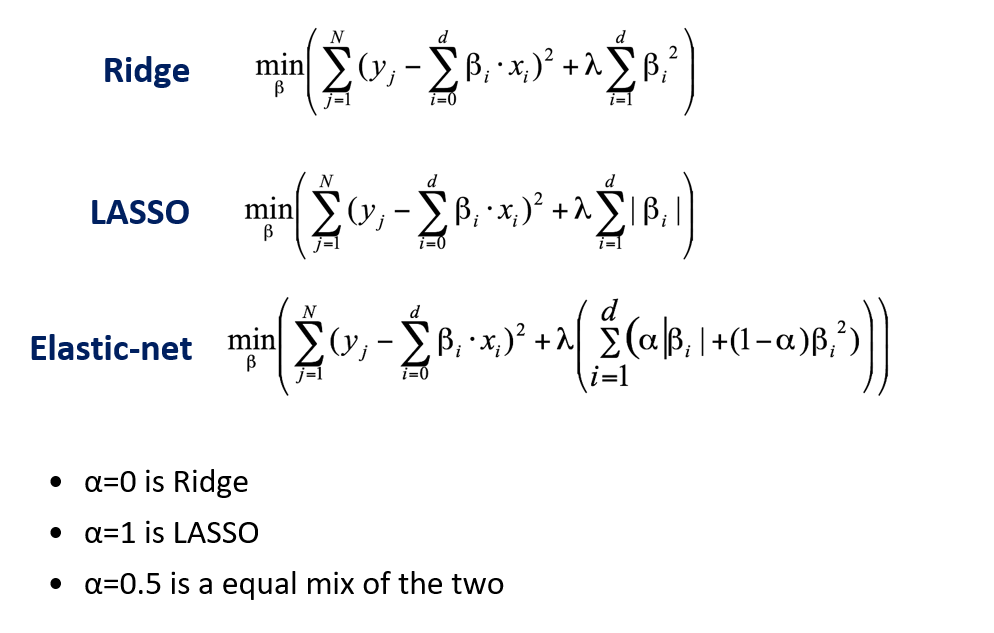

### Ridge Regression

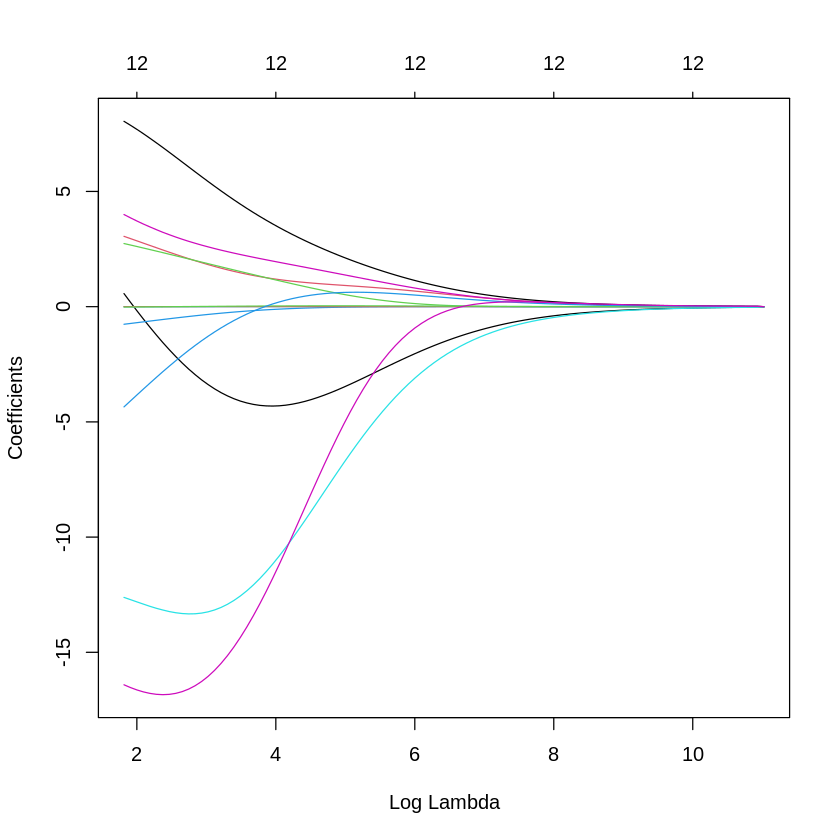

In [169]:
## Build a ridge regression model
library(glmnet)

ridge_model <- 

## plot the model
plot(ridge_model,xvar="lambda")

## Cross validation

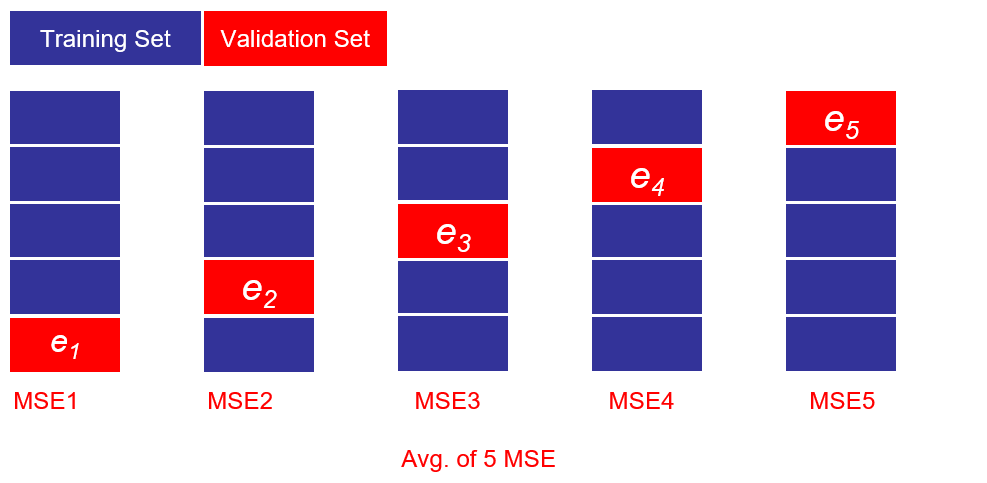

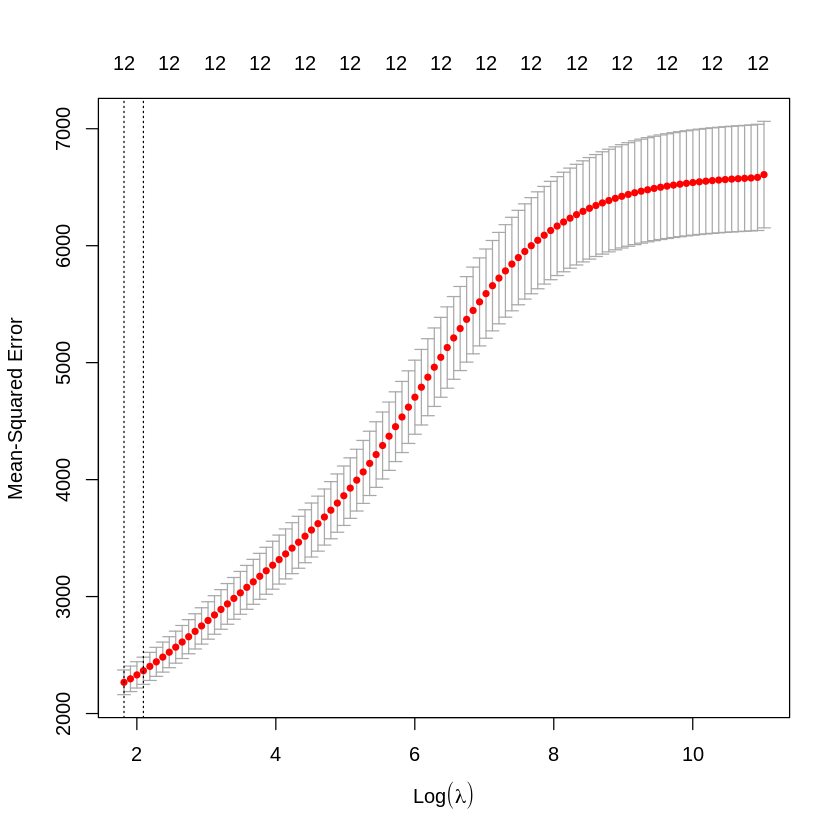

In [170]:
## Model Selection with CV
set.seed(1)
ridge_model_cv <- 

## Plot
plot(ridge_model_cv)

In [171]:
## log lambda with min average mse value
log(ridge_model_cv$lambda.min)

[1] 1.815039

In [172]:
## 1 standard error from min average mse value 

log(ridge_model_cv$lambda.1se)

[1] 2.09414

In [174]:
## Prediction on train and validation
y_pred_train_ridge_cv <- predict(ridge_model_cv,train_x)
y_pred_validation_ridge_cv <- predict(ridge_model_cv,validation_x)

## Evaluation on train and validation
regr.eval(train_data$TotalRevenueGenerated,y_pred_train_ridge_cv)
regr.eval(validation_data$TotalRevenueGenerated,y_pred_validation_ridge_cv)



mae         mse        rmse        mape 
  33.866251 2332.233947   48.293208    0.201359

mae          mse         rmse         mape 
  33.7809361 2498.8234015   49.9882326    0.1963591

#### Coefficients

In [43]:
##  Coefficients of vanilla linear regression 

coef(lin_reg)

(Intercept)                               City2 
                       27.110367981                        11.272120411 
                       NoOfChildren                       MinAgeOfChild 
                        5.111928980                         4.147084656 
                      MaxAgeOfChild                              Tenure 
                       -1.533787277                        -0.011302181 
                  FrquncyOfPurchase                  NoOfUnitsPurchased 
                        9.754843374                         9.259007631 
                    FrequencyOFPlay                     NoOfGamesPlayed 
                        0.003035429                        -0.035795220 
                    NoOfGamesBought FavoriteChannelOfTransactionUniform 
                      -10.741367557                       -13.094444880 
                FavoriteGameUniform 
                      -11.612631310

In [211]:
coef(ridge_model_cv,ridge_model_cv$lambda.min)


13 x 1 sparse Matrix of class "dgCMatrix"
                                                1
(Intercept)                          52.894631623
City2                                 0.566371246
NoOfChildren                          3.051546050
MinAgeOfChild                         2.739278446
MaxAgeOfChild                        -0.763324886
Tenure                               -0.007580763
FrquncyOfPurchase                     3.998096558
NoOfUnitsPurchased                    8.042425922
FrequencyOFPlay                       0.002567365
NoOfGamesPlayed                      -0.015299323
NoOfGamesBought                      -4.349164048
FavoriteChannelOfTransactionUniform -12.616743658
FavoriteGameUniform                 -16.409335416

In [212]:
##  Coefficients of ridge regression

coef(ridge_model_cv)



13 x 1 sparse Matrix of class "dgCMatrix"
                                                1
(Intercept)                          56.776783843
City2                                -0.538297868
NoOfChildren                          2.756253386
MinAgeOfChild                         2.544731852
MaxAgeOfChild                        -0.659797706
Tenure                               -0.007017486
FrquncyOfPurchase                     3.585026582
NoOfUnitsPurchased                    7.505554999
FrequencyOFPlay                       0.002465096
NoOfGamesPlayed                      -0.009677553
NoOfGamesBought                      -3.574654643
FavoriteChannelOfTransactionUniform -12.907984805
FavoriteGameUniform                 -16.717437909

In [222]:
linReg_model = 
ridge_model = 
data.frame(linReg_model,ridge_model)

,linReg_model,X1
,<dbl>,<dbl>
(Intercept),27.110367981,56.776783843
City2,11.272120411,-0.538297868
NoOfChildren,5.111928980,2.756253386
MinAgeOfChild,4.147084656,2.544731852
MaxAgeOfChild,-1.533787277,-0.659797706
Tenure,-0.011302181,-0.007017486
FrquncyOfPurchase,9.754843374,3.585026582
NoOfUnitsPurchased,9.259007631,7.505554999
FrequencyOFPlay,0.003035429,0.002465096


### Lasso

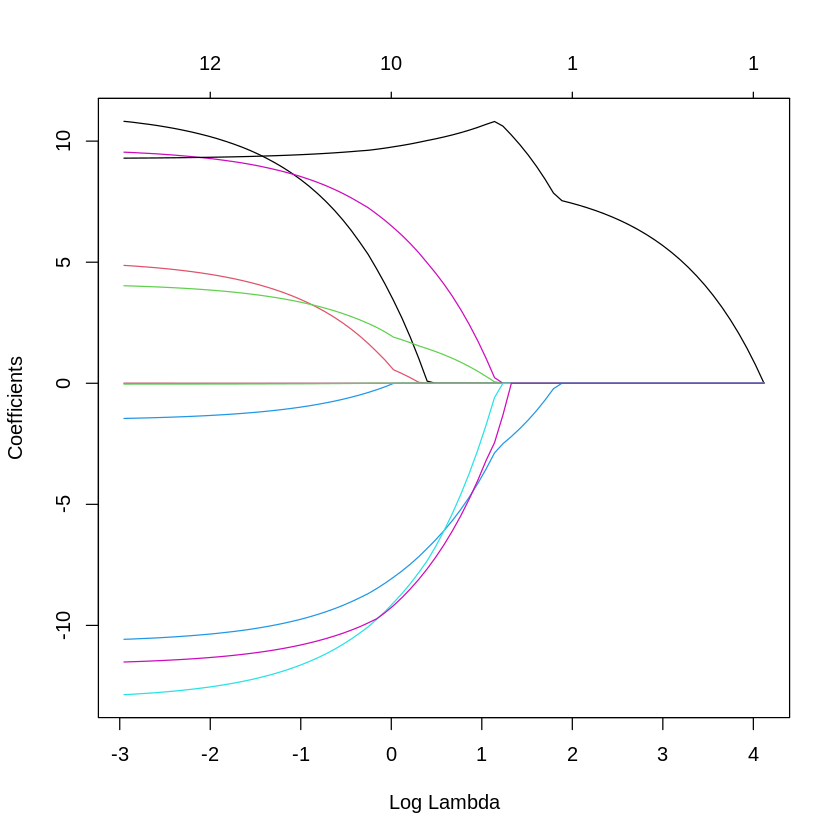

In [223]:
## Build lasso model
lasso_model <- 

## plot
plot(lasso_model,xvar="lambda")

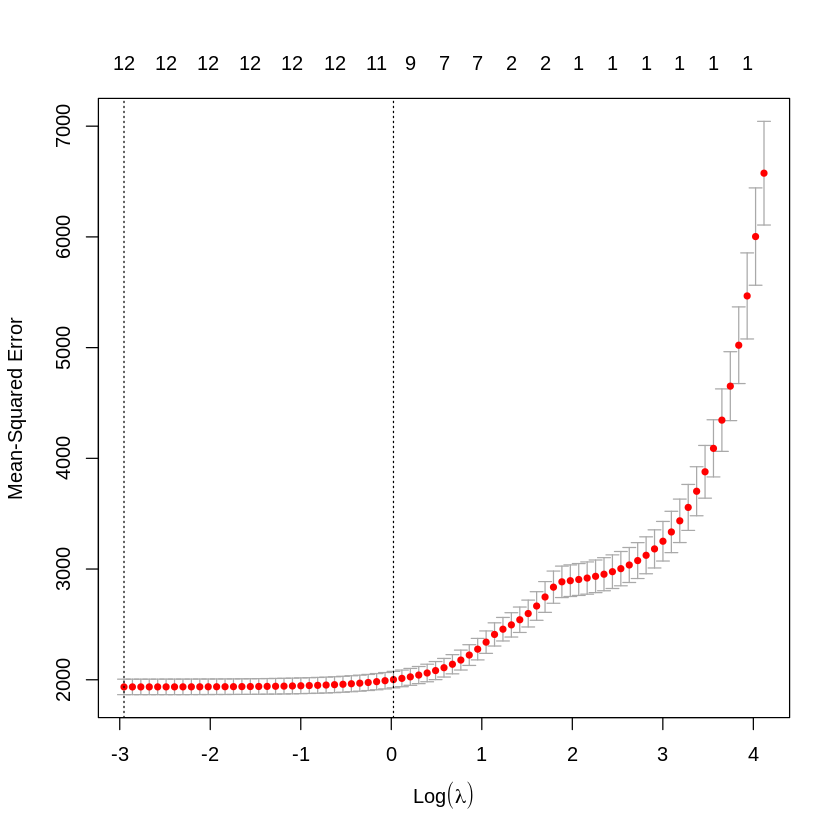

In [224]:
## Lasso Model Selection with CV
set.seed(1)
lasso_model_cv <- 

## Plot
plot(lasso_model_cv)

In [225]:
## log lambda with min average mse value

log(lasso_model_cv$lambda.min)

[1] -2.95294

In [226]:
## 1 standard error from min average mse value 

log(lasso_model_cv$lambda.1se)

[1] 0.02413967

In [227]:
## Prediction and evaluation on train and validation
y_pred_train_lasso_cv <- predict(lasso_model_cv,train_x)
y_pred_validation_lasso_cv <- predict(lasso_model_cv,validation_x)


regr.eval(train_data$TotalRevenueGenerated,y_pred_train_lasso_cv)
regr.eval(validation_data$TotalRevenueGenerated,y_pred_validation_lasso_cv)



mae          mse         rmse         mape 
  32.0540647 1979.2953829   44.4892727    0.1925554

mae          mse         rmse         mape 
  31.1076606 1940.7056220   44.0534405    0.1842615

In [228]:
## Coef of vanilla linear regression
coef(lin_reg)

(Intercept)                               City2 
                       27.110367981                        11.272120411 
                       NoOfChildren                       MinAgeOfChild 
                        5.111928980                         4.147084656 
                      MaxAgeOfChild                              Tenure 
                       -1.533787277                        -0.011302181 
                  FrquncyOfPurchase                  NoOfUnitsPurchased 
                        9.754843374                         9.259007631 
                    FrequencyOFPlay                     NoOfGamesPlayed 
                        0.003035429                        -0.035795220 
                    NoOfGamesBought FavoriteChannelOfTransactionUniform 
                      -10.741367557                       -13.094444880 
                FavoriteGameUniform 
                      -11.612631310

In [229]:
## Lasso Coef

coef(lasso_model_cv)

13 x 1 sparse Matrix of class "dgCMatrix"
                                               1
(Intercept)                         36.050446093
City2                                3.421879593
NoOfChildren                         0.557988057
MinAgeOfChild                        1.904969445
MaxAgeOfChild                       -0.005578040
Tenure                               .          
FrquncyOfPurchase                    6.424995971
NoOfUnitsPurchased                   9.765869662
FrequencyOFPlay                      0.001323025
NoOfGamesPlayed                      .          
NoOfGamesBought                     -8.011589143
FavoriteChannelOfTransactionUniform -9.064690223
FavoriteGameUniform                 -9.183081651

In [230]:
lasso_model = as.matrix(coef(lasso_model_cv))

result = data.frame(linReg_model,ridge_model,lasso_model)
names(result) = c("linear_Regression",'Ridge_Regression','Lasso_Regression')
result

,linear_Regression,Ridge_Regression,Lasso_Regression
,<dbl>,<dbl>,<dbl>
(Intercept),27.110367981,56.776783843,36.050446093
City2,11.272120411,-0.538297868,3.421879593
NoOfChildren,5.111928980,2.756253386,0.557988057
MinAgeOfChild,4.147084656,2.544731852,1.904969445
MaxAgeOfChild,-1.533787277,-0.659797706,-0.005578040
Tenure,-0.011302181,-0.007017486,0.000000000
FrquncyOfPurchase,9.754843374,3.585026582,6.424995971
NoOfUnitsPurchased,9.259007631,7.505554999,9.765869662
FrequencyOFPlay,0.003035429,0.002465096,0.001323025


## Elastic net

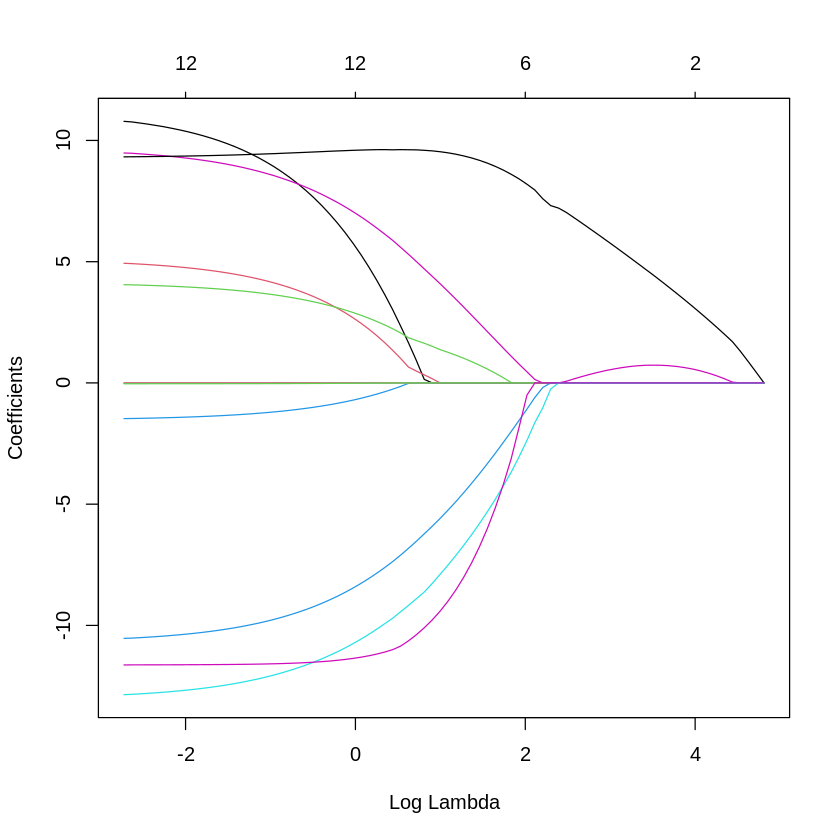

In [231]:
## Build an elastic net model with 0.5 as alpha

elastic_model <- 

## Plot
plot(elastic_model,xvar="lambda")

In [ ]:
## Exercise Build a model with alpha = 0.1

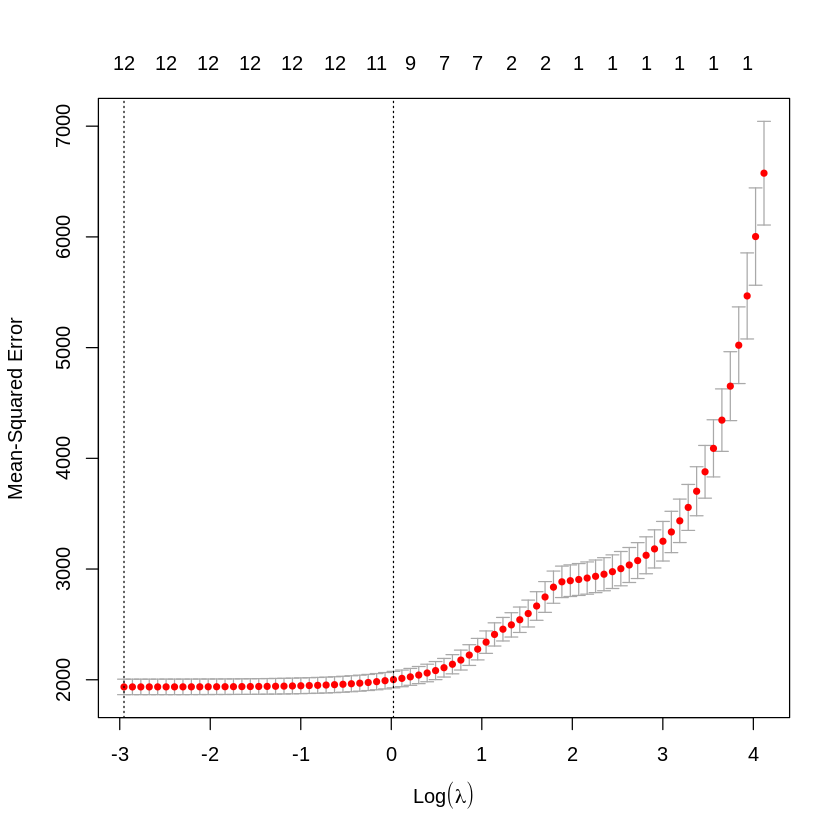

In [232]:
## Elastic net Model Selection
set.seed(1)
elastic_model_cv <- 

## Plot
plot(elastic_model_cv)

In [197]:
## Log Lambda of min average error

log(elastic_model_cv$lambda.min)

[1] -2.95294

In [198]:
## log lambda 1 se from min average error

log(elastic_model_cv$lambda.1se)

[1] 0.02413967

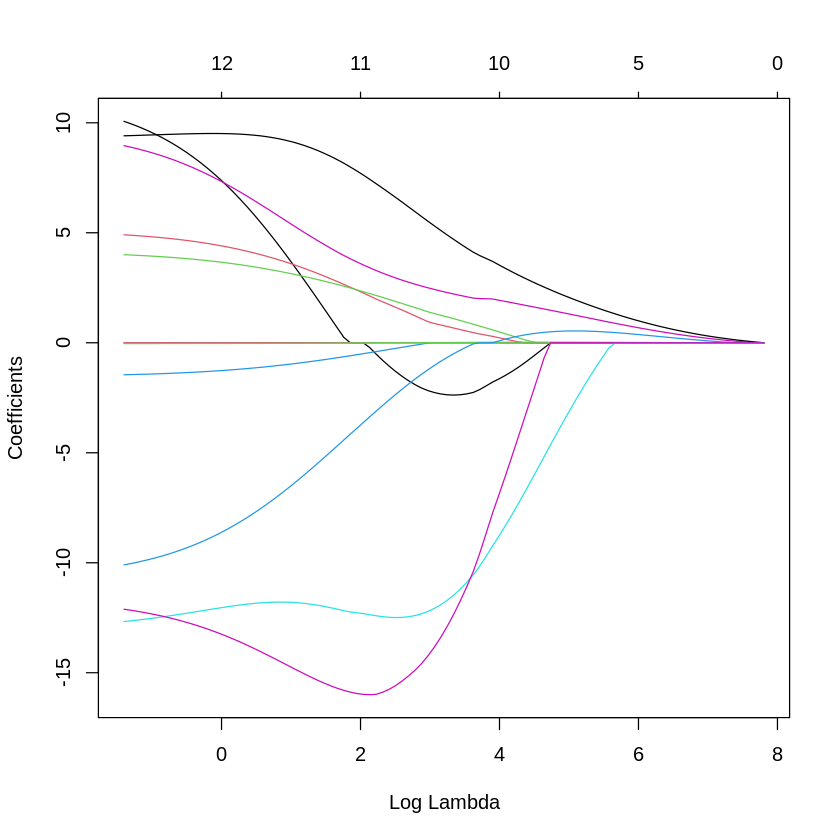

In [233]:

# Build the model with min alpha value
elastic_model <- glmnet(train_x,train_y,alpha=0.025)

## Plot
plot(elastic_model,xvar="lambda")

In [234]:
## Prediction and validation on train and validation
y_pred_train_elastic_cv <- predict(elastic_model,train_x)
y_pred_validation_elastic_cv <- predict(elastic_model,validation_x)


regr.eval(train_data$TotalRevenueGenerated,y_pred_train_elastic_cv)
regr.eval(validation_data$TotalRevenueGenerated,y_pred_validation_elastic_cv)



mae          mse         rmse         mape 
  3937.41874 339777.39637    582.90428     23.43844

mae          mse         rmse         mape 
  3993.82326 360804.00206    600.66963     23.31791

In [201]:
# Coef of vanilla linear regression

coef(lin_reg)

(Intercept)                               City2 
                       27.110367981                        11.272120411 
                       NoOfChildren                       MinAgeOfChild 
                        5.111928980                         4.147084656 
                      MaxAgeOfChild                              Tenure 
                       -1.533787277                        -0.011302181 
                  FrquncyOfPurchase                  NoOfUnitsPurchased 
                        9.754843374                         9.259007631 
                    FrequencyOFPlay                     NoOfGamesPlayed 
                        0.003035429                        -0.035795220 
                    NoOfGamesBought FavoriteChannelOfTransactionUniform 
                      -10.741367557                       -13.094444880 
                FavoriteGameUniform 
                      -11.612631310

In [242]:
# Coef of elastic net model with alpha = 0.5

elastic_model_Coeff = as.matrix(coef(elastic_model,s=elastic_model_cv$lambda.1se))


## Reading all coefficients for lambda value corresponding to least error
#ab=coef(elastic_model_cv,s = elastic_model_cv$lambda.min)
#elastic_coeff=as.data.frame.matrix(ab)


In [243]:
elastic_model_Coeff

,1
(Intercept),34.598085371
City2,7.302061173
NoOfChildren,4.391116929
MinAgeOfChild,3.651711867
MaxAgeOfChild,-1.258102307
Tenure,-0.009657577
FrquncyOfPurchase,7.289625886
NoOfUnitsPurchased,9.509739379
FrequencyOFPlay,0.002897643
NoOfGamesPlayed,-0.032579077


## Combining the coefficients of all the models and compare 

In [248]:
result = data.frame(linReg_model,ridge_model,lasso_model,elastic_model_Coeff)
names(result) = c("Linear","Ridge","Lasso","Elastic Net")
result


,Linear,Ridge,Lasso,Elastic Net
,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),27.110367981,56.776783843,36.050446093,34.598085371
City2,11.272120411,-0.538297868,3.421879593,7.302061173
NoOfChildren,5.111928980,2.756253386,0.557988057,4.391116929
MinAgeOfChild,4.147084656,2.544731852,1.904969445,3.651711867
MaxAgeOfChild,-1.533787277,-0.659797706,-0.005578040,-1.258102307
Tenure,-0.011302181,-0.007017486,0.000000000,-0.009657577
FrquncyOfPurchase,9.754843374,3.585026582,6.424995971,7.289625886
NoOfUnitsPurchased,9.259007631,7.505554999,9.765869662,9.509739379
FrequencyOFPlay,0.003035429,0.002465096,0.001323025,0.002897643


## Combine the error metrics from all the models

In [252]:
Errors_Linear <- rbind(regr.eval(train_data$TotalRevenueGenerated,y_pred_train),
      regr.eval(validation_data$TotalRevenueGenerated,y_pred_validation))

## Evaluation on train and validation
Errors_Ridge <- rbind(regr.eval(train_data$TotalRevenueGenerated,y_pred_train_ridge_cv),regr.eval(validation_data$TotalRevenueGenerated,y_pred_validation_ridge_cv))


Errors_Lasso <- rbind(regr.eval(train_data$TotalRevenueGenerated,y_pred_train_lasso_cv)
,regr.eval(validation_data$TotalRevenueGenerated,y_pred_validation_lasso_cv))


Errors_Elastic <- rbind(regr.eval(train_data$TotalRevenueGenerated,y_pred_train_elastic_cv)
,regr.eval(validation_data$TotalRevenueGenerated,y_pred_validation_elastic_cv))



In [265]:
Errors <- rbind(Errors_Linear,Errors_Lasso,Errors_Ridge,Errors_Elastic)
Model <- c(rep("Linear",2),rep("Lasso",2),rep("Rigde",2),rep("Elastic",2))
Errors <- cbind(Model,Errors)
Errors

Model,mae,mse,rmse,mape
Linear,31.6678661600125,1904.64505535762,43.6422393485671,0.191840483011064
Linear,30.6130629458555,1791.57859527293,42.3270433088934,0.182781349935782
Lasso,32.0540647428263,1979.29538293996,44.4892726726338,0.192555361693665
Lasso,31.1076606015905,1940.70562199011,44.0534405238695,0.184261478621475
Rigde,33.8662513858752,2332.23394742758,48.293208087966,0.201359045212929
Rigde,33.7809360738695,2498.823401495,49.9882326302401,0.196359054665454
Elastic,3937.41873571942,339777.396374741,582.904277197157,23.4384383117447
Elastic,3993.82326298677,360804.002056444,600.669628045604,23.3179107094161
